In [1]:
import numpy as np
import pandas as pd
from keras import models, layers

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import json
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('../data/datasets/training_data_small_track_symetric.csv')
print(f'{df.shape=}')
df.sample(5)

df.shape=(5940, 19)


,steering_angle,waypoint1_lat,waypoint1_lon,waypoint2_lat,waypoint2_lon,waypoint3_lat,waypoint3_lon,waypoint4_lat,waypoint4_lon,waypoint5_lat,waypoint5_lon,waypoint6_lat,waypoint6_lon,waypoint7_lat,waypoint7_lon,waypoint8_lat,waypoint8_lon,waypoint9_lat,waypoint9_lon
4950,0.2,0.109822,-0.321598,0.076663,-3.658582,-1.951100,-6.335364,-4.953634,-7.882817,-8.260623,-8.654194,-11.598713,-9.299158,-14.991025,-9.489701,-18.388782,-9.604468,-21.695700,-8.973225
3913,0.2,1.354411,0.101151,4.710683,-0.400022,7.810655,-1.741938,10.217624,-4.130660,12.177188,-6.907746,14.068393,-9.731167,15.656391,-12.737259,17.255740,-15.737543,18.855073,-18.737803
5059,0.3,-1.873902,-2.779156,-4.813885,-4.435182,-8.108019,-5.253866,-11.444878,-5.905906,-14.832311,-6.141942,-18.229964,-6.268145,-21.571022,-5.786562,-24.008172,-3.507060,-24.412435,-0.126695
5075,0.3,-1.157604,-1.664830,-3.944632,-3.563906,-7.208229,-4.497030,-10.547373,-5.136248,-13.922682,-5.477461,-17.320301,-5.603644,-20.702654,-5.379987,-23.421657,-3.446233,-24.464472,-0.253760
797,-0.3,-2.165844,1.620804,-5.433267,2.456095,-8.799476,2.039606,-11.948857,0.807790,-14.420128,-1.510489,-16.401954,-4.270711,-18.318120,-7.078383,-19.915268,-10.079435,-21.514598,-13.079763


In [3]:
X = df.drop(columns=['steering_angle'])
y = df['steering_angle']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4752, 18), (1188, 18), (4752,), (1188,))

In [4]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from datetime import datetime

model = Sequential([
    BatchNormalization(input_shape=(X_train.shape[1],)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])


timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
checkpoint = ModelCheckpoint(f'../weights/best_NN_{timestamp}.h5', monitor='val_loss', save_best_only=True, mode='min')

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 18)               72        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 512)               9728      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                        

In [5]:
EPOCHS = 30
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,
    batch_size=32,
    callbacks=[checkpoint],
    verbose=1
)

Epoch 1/30
149/149 [==============================] - 3s 10ms/step - loss: 0.0081 - mae: 0.0646 - val_loss: 0.0055 - val_mae: 0.0544
Epoch 2/30
149/149 [==============================] - 1s 9ms/step - loss: 0.0058 - mae: 0.0544 - val_loss: 0.0042 - val_mae: 0.0483
Epoch 3/30
149/149 [==============================] - 1s 8ms/step - loss: 0.0045 - mae: 0.0482 - val_loss: 0.0028 - val_mae: 0.0380
Epoch 4/30
149/149 [==============================] - 2s 12ms/step - loss: 0.0044 - mae: 0.0474 - val_loss: 0.0044 - val_mae: 0.0476
Epoch 5/30
149/149 [==============================] - 2s 11ms/step - loss: 0.0044 - mae: 0.0470 - val_loss: 0.0029 - val_mae: 0.0400
Epoch 6/30
149/149 [==============================] - 2s 11ms/step - loss: 0.0041 - mae: 0.0460 - val_loss: 0.0027 - val_mae: 0.0372
Epoch 7/30
149/149 [==============================] - 1s 10ms/step - loss: 0.0041 - mae: 0.0449 - val_loss: 0.0033 - val_mae: 0.0410
Epoch 8/30
149/149 [==============================] - 1s 10ms/step - lo

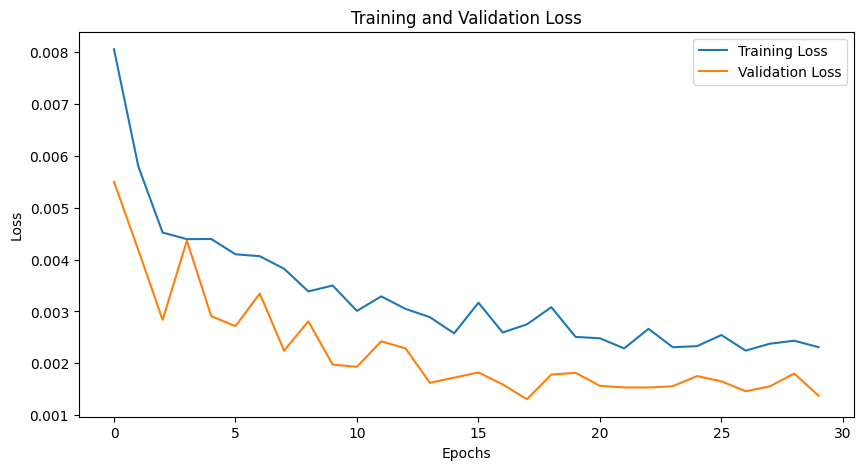

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

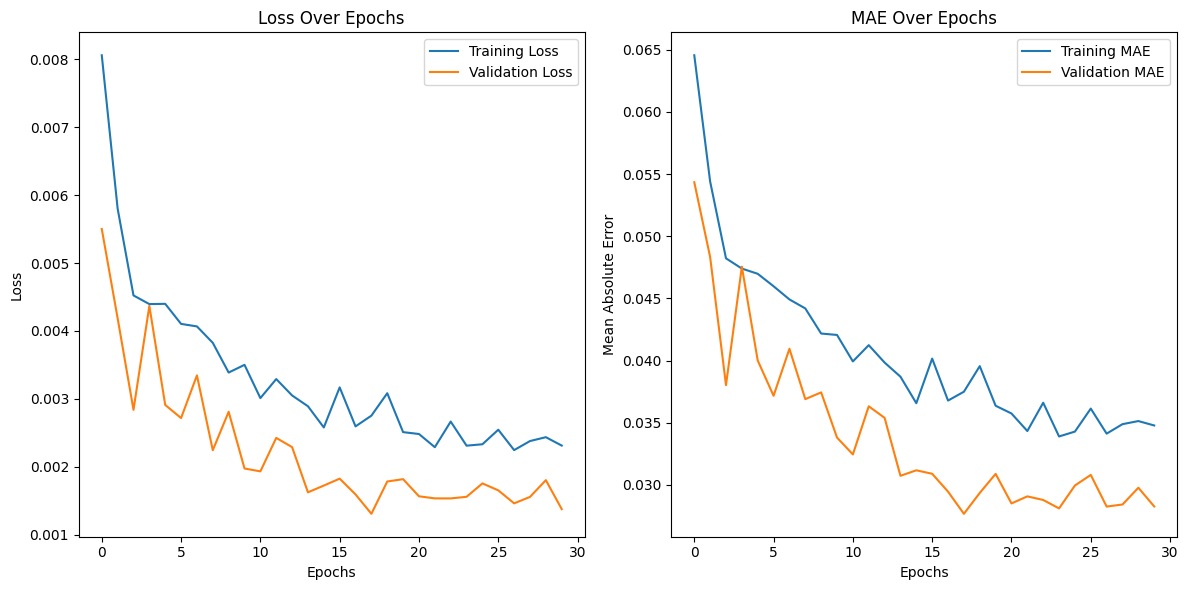

In [7]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('MAE Over Epochs')

plt.tight_layout()
plt.show()

In [8]:
model.load_weights(checkpoint.filepath)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

metrics_df = pd.DataFrame({
    "Metric": ["Mean Squared Error (MSE)", "Mean Absolute Error (MAE)", "R-squared (R2)"],
    "Value": [mse, mae, r2]
})

metrics_df

38/38 [==============================] - 0s 3ms/step


,Metric,Value
0,Mean Squared Error (MSE),0.001307
1,Mean Absolute Error (MAE),0.027679
2,R-squared (R2),0.943932


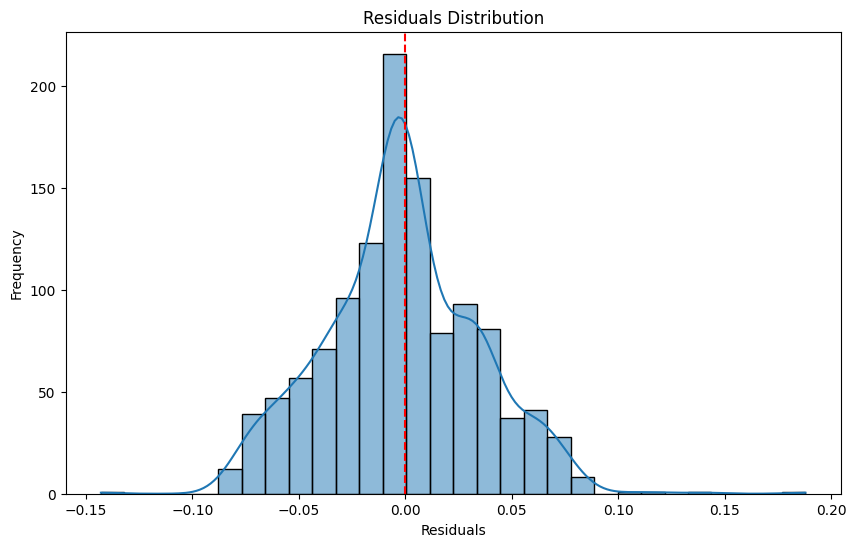

In [9]:
residuals = y_test - y_pred.flatten()
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

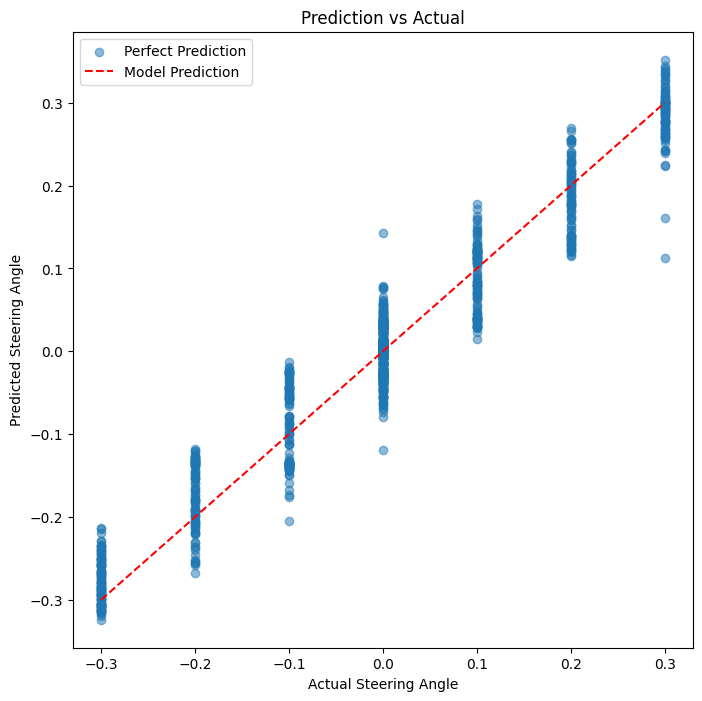

In [10]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Steering Angle')
plt.ylabel('Predicted Steering Angle')
plt.title('Prediction vs Actual')
plt.legend(['Perfect Prediction', 'Model Prediction'])
plt.show()

In [11]:
name = 'nn_512_256_128_64'
model_json = model.to_json()
with open(f'../models/{name}.json', 'w') as json_file:
    json.dump(json.loads(model_json), json_file, indent=4)

In [12]:
metadata = {
    "model_name": "nn_512_256_128_64",
    "model_path": f"../models/{name}.json",
    "timestamp": timestamp,
    "input_shape": list(X_train.shape[1:]),
    "output_shape": [1],
    "optimizer": {
        "type": "Adam",
        "learning_rate": 0.001
    },
    "loss_function": "mse",
    "metrics": ["mae"],
    "training": {
        "epochs": len(history.history['loss']),
        "batch_size": 32,
        "best_model_path": checkpoint.filepath,
        "final_training_loss": history.history['loss'][-1],
        "final_validation_loss": history.history['val_loss'][-1]
    },
    "evaluation": {
        "mse": mse,
        "mae": mae,
        "r2": r2
    }
}

try:
    with open("metadata.jsonl", "r+") as f:
        lines = f.readlines()
        if json.dumps(metadata) + "\n" not in lines:
            f.write(json.dumps(metadata) + "\n")
except FileNotFoundError:
    with open("metadata.jsonl", "w") as f:
        f.write(json.dumps(metadata) + "\n")

In [13]:
with open("metadata.jsonl", "r") as f:
    lines = f.readlines()

print(json.dumps(json.loads(lines[-1]), indent=4))

{
    "model_name": "nn_512_256_128_64",
    "model_path": "../models/nn_512_256_128_64.json",
    "timestamp": "20250601_133219",
    "input_shape": [
        18
    ],
    "output_shape": [
        1
    ],
    "optimizer": {
        "type": "Adam",
        "learning_rate": 0.001
    },
    "loss_function": "mse",
    "metrics": [
        "mae"
    ],
    "training": {
        "epochs": 30,
        "batch_size": 32,
        "best_model_path": "../weights/best_NN_20250601_133219.h5",
        "final_training_loss": 0.0023114485666155815,
        "final_validation_loss": 0.0013759519206359982
    },
    "evaluation": {
        "mse": 0.0013068344615517243,
        "mae": 0.027678581554974074,
        "r2": 0.9439319793656792
    }
}
